## 【問題1】100日目の米粒の数

100日目には合計で米粒をいくつもらっているのかを計算するコードを作成し、
答えを出力してください。
また、1日目から100日目までの「その日にもらう米の数」と「その日までに累計で貰う米の数」の推移を折れ線グラフで表現してください。（縦軸が米の数、横軸が日数）

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

- 「その日にもらう米の数」の折れ線グラフ

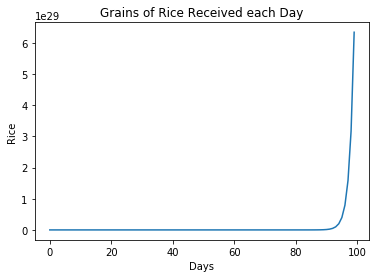

In [2]:
NUMBER_OF_DAYS = 100
grains_of_rice = 1
receivable_rice = [grains_of_rice]

for i in range(1, NUMBER_OF_DAYS):
    receivable_rice.append(receivable_rice[-1]*2)

plt.title("Grains of Rice Received each Day")
plt.xlabel("Days")
plt.ylabel("Rice")
plt.plot(receivable_rice)
plt.show()

- 「その日までに累計で貰う米の数」の折れ線グラフ

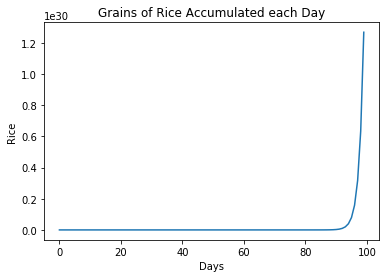

In [3]:
accumulated_rice = 1
accumulated_rice_list = [grains_of_rice]

for i in range(1, NUMBER_OF_DAYS):
    grains_of_rice *= 2
    accumulated_rice += grains_of_rice
    accumulated_rice_list.append(accumulated_rice)

plt.title("Grains of Rice Accumulated each Day")
plt.xlabel("Days")
plt.ylabel("Rice")
plt.plot(accumulated_rice_list)
plt.show()

## 【問題2】100日目以外の米粒の数

この逸話は30日だったり81日だったりと日数が曖昧です。\
どの話にも対応できるように日数を引数とした 関数 を作成しましょう。\
関数を作成した上で、コースを受講する日数の間でいくつ米粒をもらえるかを答えてください。\
前の問題同様に折れ線グラフも出力してください。

In [4]:
def compute_sorori_shinzaemon(day=100):
    """
    曽呂利新左衛門の米の逸話を検証する関数。日にちごとの米の粒の数を計算する。

    Parameters
    --------------
    day: int
        米を貰う日数 (default : 100)

    Returns
    --------------
    list_n_grains : list
        ある日に貰う米の数のリスト（リストの長さはdayに等しくなる）
    list_total_grains : list
        ある日までに累計で貰う米の数のリスト（リストの長さはdayに等しくなる）
    """
    grains_of_rice = 1
    list_n_grains = [grains_of_rice]
    for i in range(1, day):
        list_n_grains.append(list_n_grains[-1]*2)

    accumulated_rice = 1
    list_total_grains = [grains_of_rice]
    for i in range(1, day):
        grains_of_rice *= 2
        accumulated_rice += grains_of_rice
        list_total_grains.append(accumulated_rice)

    return list_n_grains, list_total_grains

In [5]:
NUMBER_OF_ATTENDANCE_DAYS = 42
list_n_grains, list_total_grains = compute_sorori_shinzaemon(NUMBER_OF_ATTENDANCE_DAYS)

コースを受講する期間は、
7月1日から10月31日までの授業がある日の日数をカウント(42日)。

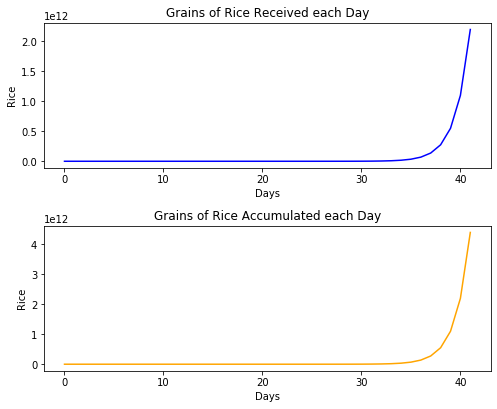

In [6]:
fig = plt.figure(figsize=(8.0, 6.4))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
fig.subplots_adjust(hspace=0.4)

ax1.set_title('Grains of Rice Received each Day')
ax1.set_xlabel('Days')
ax1.set_ylabel('Rice')

ax2.set_title('Grains of Rice Accumulated each Day')
ax2.set_xlabel('Days')
ax2.set_ylabel('Rice')

xlabel = list(range(0,NUMBER_OF_ATTENDANCE_DAYS))
ax1_ylabel = list_n_grains
ax2_ylabel = list_total_grains
line, = ax1.plot(xlabel, ax1_ylabel, color='blue')
line, = ax2.plot(xlabel, ax2_ylabel, color='orange')

plt.show()

## 【問題3】何人が何日生活できる米か

この米があれば何人が何日生活できるか計算する関数を作成してください。\
コースを受講する期間に貰える米粒で、このクラスにいる人数であれば、何日間生活できるかを出力してみましょう。

関数の最低限の入力は 米粒の数(int) と 人数(int) 、出力は 生活できる日数(int) です。\
関数名やコメントなどは分かりやすく考えて作成してください。

ここでは1日に必要な米粒の数は提示しません。\
自分なりに調べて、計算式に落とし込んでください。\
どう調べ、何を根拠にしたかもコメントを残しておいてください。

In [7]:
def how_many_days_to_live(bowl, meals, students, total):
    """
    コースを受講する日数の間にもらえる米粒で、何日間生活できるかを計算する。

    Parameters
    --------------
    bowl: int
        茶碗一杯の米粒の数
    meals: int
        １日何食
    students: int
        コース受講生の数
    total: int
        コースを受講する日数の間にもらえる米粒の合計

    Returns
    --------------
    days : int
        何日間生活できるかの日数
    """
    days = total // (bowl * meals * students) 

    return days

In [8]:
A_BOWL_OF_GRAINS = 3250
HOW_MANY_MEALS_A_DAY = 3
NUMBER_OF_STUDENTS = 14
TOTAL_N_GRAINS = list_total_grains[-1]

days = how_many_days_to_live(A_BOWL_OF_GRAINS, HOW_MANY_MEALS_A_DAY, NUMBER_OF_STUDENTS, TOTAL_N_GRAINS)
print("{:,}日間が生活できる日数の目安です。".format(days))

32,220,120日間が生活できる日数の目安です。


- 根拠\
茶椀1杯のお米の粒（約65g）を数えると、約3，250粒あります。\
農林水産省：消費者の部屋より\
3,250粒 × 3食（１日） = 9,750粒